# **Data collection**

### Read data into dataframe

In [69]:
import pandas as pd 
animals = pd.read_csv("./animals_feed.csv") # read csv file
print('read successfully')

read successfully


### Check dimension of dataframe

In [70]:
animals.shape # check dimension of datframe

(4, 7)

### Check first colums of dataframe

In [71]:
animals.head() # print dataframe

,id,animal,mammal,carrot vegetable,chicken meat,pork meat,grains vegetable
0,1,Rabbit,yes,yes,no,no,yes
1,2,dog,yes,yes,yes,yes,no
2,3,cat,yes,yes,yes,yes,no
3,4,bird,no,yes,no,no,yes


# **Data understanding**

### Check existing names

In [72]:
import re
column_names = list(animals.columns.values)
print([match.group(0) for column_name in column_names for match in [(re.compile(".*(meat).*")).search(column_name)] if match])
print([match.group(0) for column_name in column_names for match in [(re.compile(".*(veg).*")).search(column_name)] if match])

['chicken meat', 'pork meat']
['carrot vegetable', 'grains vegetable']


##### There are just as many types of vegetables as there are types of meat in the dataframe

In [73]:
animals["mammal"].value_counts() 

mammal
yes    3
no     1
Name: count, dtype: int64

##### There are more mammals than vertebrates in the dataframe

# **Data preparation**

### Check amount of animal names

In [74]:
animals['animal'].value_counts()

animal
Rabbit    1
dog       1
cat       1
bird      1
Name: count, dtype: int64

### change column values 

In [75]:
animals.loc[animals["mammal"] == "yes","mammal"] = "mammal"
animals.loc[animals["mammal"] == "no","mammal"] = "others"
animals

,id,animal,mammal,carrot vegetable,chicken meat,pork meat,grains vegetable
0,1,Rabbit,mammal,yes,no,no,yes
1,2,dog,mammal,yes,yes,yes,no
2,3,cat,mammal,yes,yes,yes,no
3,4,bird,others,yes,no,no,yes


### change column name

In [76]:
column_names = animals.columns.values
column_names[2] = 'animal species'
animals.columns = column_names
animals

,id,animal,animal species,carrot vegetable,chicken meat,pork meat,grains vegetable
0,1,Rabbit,mammal,yes,no,no,yes
1,2,dog,mammal,yes,yes,yes,no
2,3,cat,mammal,yes,yes,yes,no
3,4,bird,others,yes,no,no,yes


### unify column values

In [77]:
animals["animal"] = animals["animal"].str.lower()
animals

,id,animal,animal species,carrot vegetable,chicken meat,pork meat,grains vegetable
0,1,rabbit,mammal,yes,no,no,yes
1,2,dog,mammal,yes,yes,yes,no
2,3,cat,mammal,yes,yes,yes,no
3,4,bird,others,yes,no,no,yes


### exclude rows

In [78]:
import numpy as np # import numpy library

animal_species_counts = animals["animal species"].value_counts()
animal_species_indices = animal_species_counts > 1
animal_species_to_keep = list(np.array(animal_species_counts.index.values)[np.array(animal_species_indices)])
animal_species_to_keep

['mammal']

In [79]:
rows_before = animals.shape[0] 
print("Amount rows old dataframe: {}.".format(rows_before))

animals = animals.loc[animals['animal species'].isin(animal_species_to_keep)]

rows_after = animals.shape[0]
print("Amount rows new dataframe: {}.".format(rows_after))

print("{} rows removed!".format(rows_before - rows_after))

Amount rows old dataframe: 4.
Amount rows new dataframe: 3.
1 rows removed!


### change string to binary

In [80]:
feed = animals.replace(to_replace="yes", value=1)
feed = feed.replace(to_replace="no", value=0)
feed.head()

,id,animal,animal species,carrot vegetable,chicken meat,pork meat,grains vegetable
0,1,rabbit,mammal,1,0,0,1
1,2,dog,mammal,1,1,1,0
2,3,cat,mammal,1,1,1,0


### show percentage feed

In [81]:

feed_droped_columns = feed.drop(['id','animal','animal species'], axis=1)
feed_droped_columns.mean()


carrot vegetable    1.000000
chicken meat        0.666667
pork meat           0.666667
grains vegetable    0.333333
dtype: float64

##### all animals (100%) in the list eat carrots. 2 of 3 animals (66,66%) eat meat. grains are eaten by 1 out of 3 animals (33,33%)

# **Model modeling**

### creat decision tree

In [82]:
from sklearn import tree

In [83]:
feed_droped_columns.head()

,carrot vegetable,chicken meat,pork meat,grains vegetable
0,1,0,0,1
1,1,1,1,0
2,1,1,1,0


In [84]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(feed_droped_columns, ['rabbit','dog','cat'])
print("decision tree created")

decision tree created


[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]')]

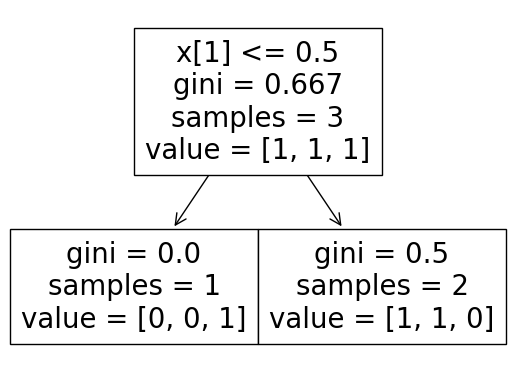

In [85]:
tree.plot_tree(decision_tree)

##### example: if it doesn't eat chicken meat x[1] then it is a rabbit [sample 1]